In [ ]:
import zipfile

# Specify the path to the zip file you want to extract
zip_file_path = "/content/EMOTION DETECTION.zip"

# Specify the directory where you want to extract the contents
extracted_dir = "/content/Emotion Detection "

# Open the zip file for reading
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file into the specified directory
    zip_ref.extractall(extracted_dir)

# The contents of the zip file have been extracted to 'extracted_dir'


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
img_array = cv2.imread("/content/Emotion Detection /train/0/Training_89795509.jpg")

In [ ]:
img_array.shape


(48, 48, 3)

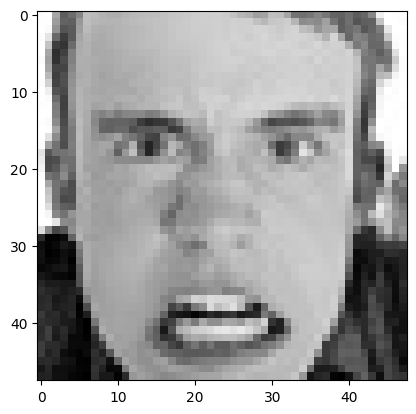

In [ ]:
plt.imshow(img_array)


In [ ]:
Datadirectory = "/content/Emotion Detection /train/"


In [ ]:
Classes = ["0","1","2","3","4","5","6"]

/content/Emotion Detection /train/0


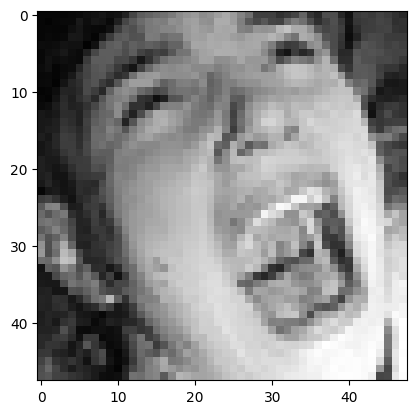

In [ ]:
for category in Classes:
    path =  os.path.join(Datadirectory, category)
    print(path)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

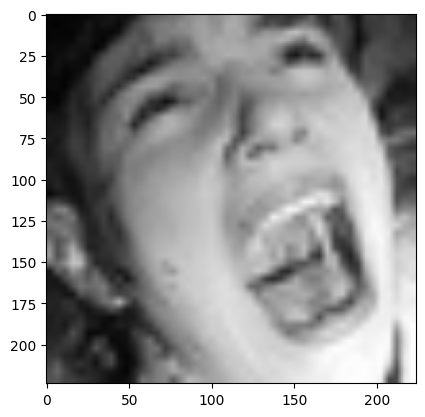

In [ ]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape


(224, 224, 3)

In [ ]:
import tensorflow as tf
batch_size=32
img_size=224

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Emotion Detection /train",
    image_size=(img_size,img_size),
    batch_size=32
)

Found 6601 files belonging to 7 classes.


In [ ]:
dataset.class_names

['0', '1', '2', '3', '4', '5', '6']

In [ ]:
print(len(dataset)
     )

207


In [ ]:
train_size = 0.8
len(dataset)*train_size

165.60000000000002

In [ ]:
train_ds = dataset.take(165)
len(train_ds)

165

In [ ]:
test_ds =  dataset.skip(165)
len(test_ds)

42

In [ ]:
val_size=0.1
len(dataset)*val_size

20.700000000000003

In [ ]:
val_ds = test_ds.take(20)
len(val_ds)

20

In [ ]:
test_ds = test_ds.take(20)
len(test_ds)

20

In [ ]:
import tensorflow as tf
import keras
import tensorflow.keras.layers as kt
channels = 7
batch_size=32
tf.keras.applications.MobileNet(
    input_shape=(batch_size,img_size,img_size,channels),
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=7,
    classifier_activation="softmax",

)

ValueError: ignored

In [ ]:
model = tf.keras.applications.MobileNetV2()

In [ ]:
 model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
base_input = model.layers[0].input


In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
final_output = kt.Dense(128)(base_output)
final_output = kt.Activation('relu')(final_output)
final_output = kt.Dense(64)(final_output)
final_output = kt.Activation('relu')(final_output)
final_output = kt.Dense(7,activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer ="adam",metrics = ["accuracy"])

In [ ]:
new_model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data = val_ds,
    verbose=1,
    epochs=25
)


Epoch 1/25
165/165 [==============================] - 73s 162ms/step - loss: 1.5028 - accuracy: 0.4777 - val_loss: 10.7455 - val_accuracy: 0.2016
Epoch 2/25
165/165 [==============================] - 27s 165ms/step - loss: 1.2783 - accuracy: 0.5413 - val_loss: 5.3252 - val_accuracy: 0.2188
Epoch 3/25
165/165 [==============================] - 35s 213ms/step - loss: 1.1273 - accuracy: 0.5949 - val_loss: 6.7454 - val_accuracy: 0.2234
Epoch 4/25
165/165 [==============================] - 28s 166ms/step - loss: 1.0281 - accuracy: 0.6265 - val_loss: 7.8557 - val_accuracy: 0.1937
Epoch 5/25
165/165 [==============================] - 28s 168ms/step - loss: 0.9498 - accuracy: 0.6513 - val_loss: 8.4965 - val_accuracy: 0.2031
Epoch 6/25
165/165 [==============================] - 28s 166ms/step - loss: 0.8548 - accuracy: 0.6881 - val_loss: 5.5662 - val_accuracy: 0.1375
Epoch 7/25
165/165 [==============================] - 28s 167ms/step - loss: 0.7959 - accuracy: 0.7138 - val_loss: 2.3608 - val_a

In [ ]:
score = new_model.evaluate(test_ds)

20/20 [==============================] - 4s 48ms/step - loss: 6.9223 - accuracy: 0.2078


In [ ]:
new_model.save("Final_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
